## 이슬점 온도(Dew Point)

이슬점은 대기 속의 수증기가 포화되어 그 수증기의 일부가 물로 응결할 때의 온도를 뜻한다.

상대 습도 : 대기 중에 포함된 수증기의 압력을 포화수증기의 압력으로 나눈 것

포화수증기량은 온도에 따라 올라가기 때문에, 대기를 냉각시켜서 포화수증기량이 감소하면 상대습도가 증가한다.

상대습도가 100%가 되는 포화 상태에서는 대기 중의 수증기가 더 이상 기체 상태로 존재하지 못하고 액체인 물방울로 변하게 된느데, 이때의 온도를 이슬점이라고 한다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [9]:
solar_data = pd.read_csv('train.csv',encoding='utf-8')
solar_data.head()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,1.5,69.08,-12,0.0
1,0,0,30,0,0,1.5,69.06,-12,0.0
2,0,1,0,0,0,1.6,71.78,-12,0.0
3,0,1,30,0,0,1.6,71.75,-12,0.0
4,0,2,0,0,0,1.6,75.20,-12,0.0


In [3]:
def eval_dewpoint(T, RH):
    b = 17.62
    c = 243.12
    gamma = (b * T / (c + T)) + math.log(RH / 100.0)
    dewpoint = (c * gamma) / (b - gamma)
    return dewpoint

In [4]:
for i in range(len(solar_data)):
    solar_data.loc[i, ["DP"]] = eval_dewpoint(float(solar_data.loc[i, ["T"]]), solar_data.loc[i , ["RH"]])

In [7]:
solar_data = solar_data.reindex(columns=["Day", "Hour", "Minute", "DHI", "DNI", "WS", "RH", "T", "DP", "TARGET"])

In [8]:
print(solar_data.head(50))


    Day  Hour  Minute    DHI    DNI   WS     RH     T         DP     TARGET
0     0     0       0    0.0    0.0  1.5  69.08 -12.0 -16.522271   0.000000
1     0     0      30    0.0    0.0  1.5  69.06 -12.0 -16.525742   0.000000
2     0     1       0    0.0    0.0  1.6  71.78 -12.0 -16.061776   0.000000
3     0     1      30    0.0    0.0  1.6  71.75 -12.0 -16.066807   0.000000
4     0     2       0    0.0    0.0  1.6  75.20 -12.0 -15.500215   0.000000
5     0     2      30    0.0    0.0  1.5  69.29 -11.0 -15.524406   0.000000
6     0     3       0    0.0    0.0  1.5  72.56 -11.0 -14.965431   0.000000
7     0     3      30    0.0    0.0  1.4  72.55 -11.0 -14.967106   0.000000
8     0     4       0    0.0    0.0  1.3  74.62 -11.0 -14.624744   0.000000
9     0     4      30    0.0    0.0  1.3  74.61 -11.0 -14.626377   0.000000
10    0     5       0    0.0    0.0  1.3  73.74 -11.0 -14.769239   0.000000
11    0     5      30    0.0    0.0  1.3  73.73 -11.0 -14.770890   0.000000
12    0     

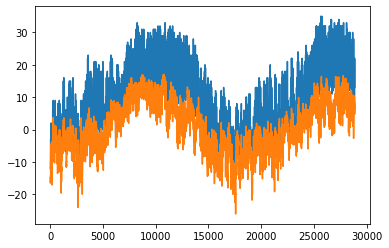

In [6]:
plt.plot(range(len(solar_data)), solar_data["T"])
plt.plot(range(len(solar_data)), solar_data["DP"])
plt.show()